In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy.linalg
import random

path = "DataScience_salaries_2024.csv"

df = pd.read_csv(path, usecols=['job_title','experience_level'])
#df = pd.read_csv(path)
#df = df.dropna(axis=0, how='any')
df = df.drop_duplicates()
df

,experience_level,job_title
0,MI,Data Scientist
1,MI,BI Data Analyst
3,MI,ML Engineer
4,SE,Lead Machine Learning Engineer
6,SE,Data Science Manager
...,...,...
14751,EN,Data Analytics Manager
14800,EN,Data Quality Engineer
14818,EN,Data Analytics Engineer
14823,EN,Data Analyst Lead


In [2]:
# Chuyển đổi dataframe thành đồ thị
job_title = df['job_title']
experience_level = df['experience_level']
print("Số lượng ngành nghề:", job_title.nunique())
print("Số lượng mức độ kinh nghiệm:", experience_level.nunique())
print("Số cạnh", len(df))

Số lượng ngành nghề: 153
Số lượng mức độ kinh nghiệm: 4
Số cạnh 334


In [3]:
from networkx.algorithms import bipartite
B = nx.Graph()
for index, row in df.iterrows():
  B.add_edge(row['job_title'], row['experience_level'], weight=1)
B.add_nodes_from(job_title, bipartite=0)
B.add_nodes_from(experience_level, bipartite=1)

<Figure size 1500x1500 with 0 Axes>

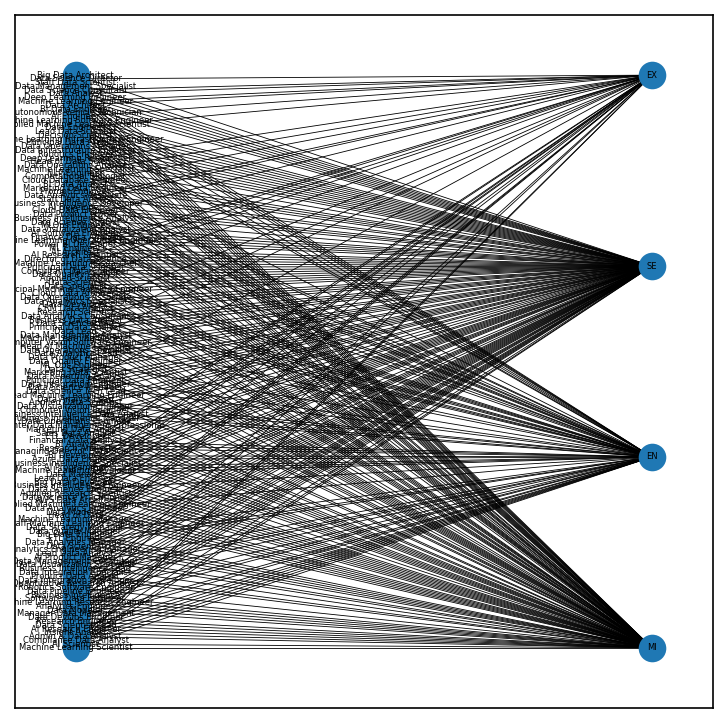

In [4]:
plt.figure(figsize=(15,15))
pos = nx.spring_layout(B, scale = 40)
fig, ax = plt.subplots(1,1, figsize=(6,6), dpi = 150)
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B, job_title), font_size=4, width=0.4, node_size=150)

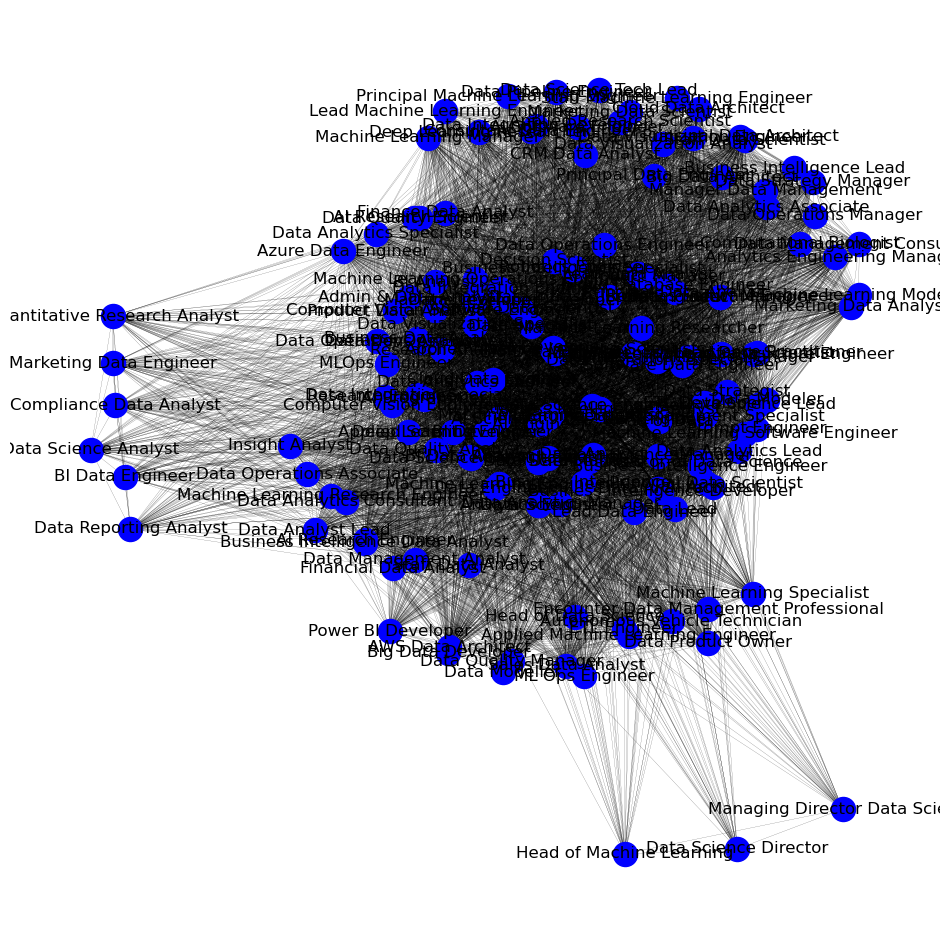

In [5]:
from networkx.algorithms import bipartite
job_title = list(set(job_title))  # Loại bỏ các phần tử trùng lặp
G = bipartite.weighted_projected_graph(B, job_title)
plt.figure(figsize=(12, 12))

layout = nx.spring_layout(G)

# Vẽ các đỉnh
nx.draw_networkx_nodes(
    G,
    layout,
    nodelist=job_title,
    node_size=300,
    node_color='blue'
)

# Vẽ các cạnh
nx.draw_networkx_edges(G, layout, width=0.1, edge_color="#000000")

# Đặt nhãn cho các đỉnh
node_labels = dict(zip(job_title, job_title))
nx.draw_networkx_labels(G, layout, labels=node_labels)

plt.axis('off')
plt.show()

In [6]:
#in đồ thị 1 phía ra file csv
labels = nx.get_edge_attributes(G,'weight')
data = [{'source': key[0], 'target': key[1], 'weight': value} for key, value in labels.items()]
df2 = pd.DataFrame(data)
df2.to_csv(r'dothi1phia_full.csv', index = False, header = True)

In [9]:
from sklearn.cluster import KMeans
inertia=[]
for n in range (1,11):
    algorithm = KMeans(n_clusters =n, init='random')
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

NameError: name 'X' is not defined